# Regression

#### Setting up the required libraries:
-  numpy is needed for the basic array data structure in which most data will be stored
-  pandas is needed for the easy handeling of data sets
-  matplotlib is needed for the plotting and displaying
-  sklearn will supply the classifier and all its functions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets

Here we can choose to ignore some warnings that are not important for this exercise.

In [2]:
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
warnings.simplefilter(action='ignore', category=DataConversionWarning)


Again, it is helpfull to keep the random generation constant in order to produce the same results everytime we run the script.

In [3]:
np.random.seed(2304)

### Simple Regression

First we will take a look at the most basic regression task, linear regression. We will take two features and calculate a model that will allow us to predict one of the features based on the other.

The data we use comes from the online machine learning data base Kaggle: https://www.kaggle.com/jeevannagaraj/indian-liver-patient-dataset . You might have to make an account in order to download the data. 

Can also be found on uci: https://archive.ics.uci.edu/ml/machine-learning-databases/00225/Indian%20Liver%20Patient%20Dataset%20(ILPD).csv (without feature names)

If you save the .csv file in the same directory as this python script the following code will work as is. If you choose to save the data in a different location you will have to include the path to the data in the script.

In [4]:
liver = pd.read_csv(r'indian_liver_patient.csv' )
liver.head(10)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,Female,0.9,0.3,202,14,11,6.7,3.6,1.10,1
8,17,Male,0.9,0.3,202,22,19,7.4,4.1,1.20,2
9,55,Male,0.7,0.2,290,53,58,6.8,3.4,1.00,1


The data consists of liver test data from 583 different people. The last column 'Dataset' has a '2' for liver patients and a  '1' for presumably healty livers. However, since we are looking to learn about regression we are more interested in continuous features. 

First we can look at the data types and see if we have some data pre-processing to do.

In [5]:
liver.dtypes

Age                             int64
Gender                         object
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                         int64
dtype: object

The gender labels 'Female' and 'Male' are 'objects' and can easily be converted to numerical values:

In [6]:
liver['Gender']=liver['Gender'].replace('Female', 0)
liver['Gender']=liver['Gender'].replace('Male', 1)
liver.head(10)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,1,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,0,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,0,0.9,0.3,202,14,11,6.7,3.6,1.10,1
8,17,1,0.9,0.3,202,22,19,7.4,4.1,1.20,2
9,55,1,0.7,0.2,290,53,58,6.8,3.4,1.00,1


Before we continue let's check whether there are any missing values in the data set:

In [7]:
liver.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

Looks like we found some. Since there are only 4 in total we can choose to simply drop the 4 rows with missing values. (Different ways in dealing with missing values will be the topic of a future exercise).

In [8]:
print(liver.shape)
liver=liver.dropna()
liver.shape

(583, 11)


(579, 11)

##### Scatter matrix

For the display of the scatter matrix we can select a label:

In [9]:
ill = liver.ix[:, -1]
ill.shape

(579,)

and calculate the scatter matrix:

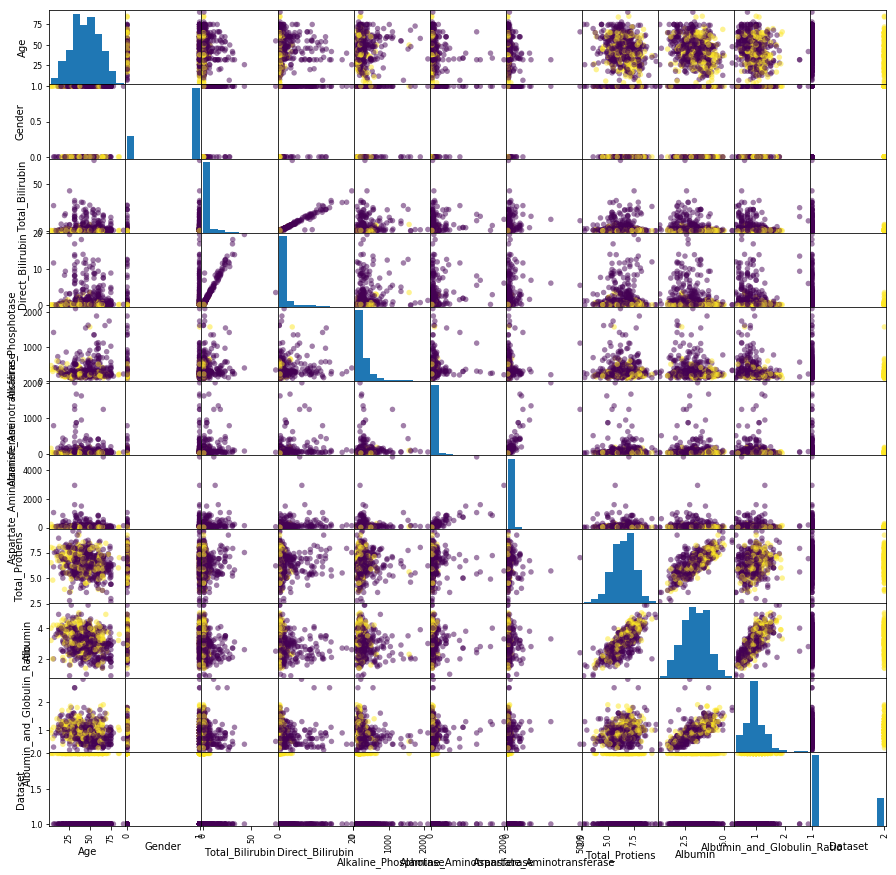

In [10]:
pd.plotting.scatter_matrix(liver, c=ill, figsize=(15,15), marker='o', s=30),
plt.show()

Now we can have a look at the data and the correlation between different combinations of features. We can also see that some of these features show no obvious correlation while others clearly do.

Now you can choose for youself a set of two correlated features and try and create a linear regression model.

First, lets take a closer look at the two features you have chosen:

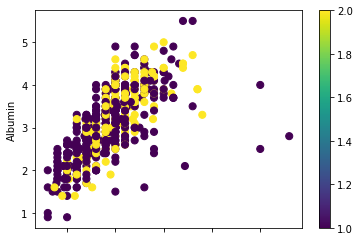

In [11]:
liver.plot.scatter(x='Albumin_and_Globulin_Ratio', y='Albumin', c=ill, colormap='viridis', s=50);

If you are happy with your choice we can create the two data sets for the two features:

In [64]:
x = liver.ix[:, ['Albumin_and_Globulin_Ratio']]
y = liver.ix[:, ['Albumin']]

And that is already all we need to calculate the linear regression model:

In [13]:
from sklearn import linear_model
lin_reg = linear_model.LinearRegression()
lin_reg.fit(x,y);

Let's have a look at our model:

In [14]:
y_proba = lin_reg.predict(x)

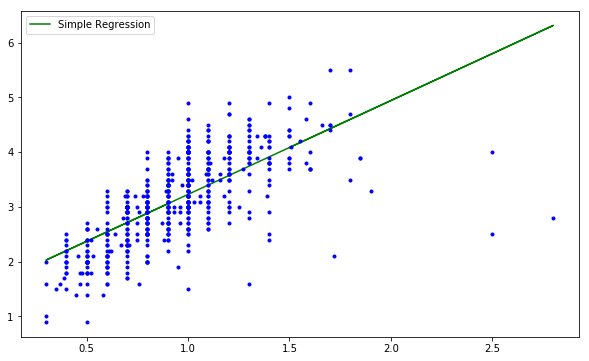

In [15]:
f = plt.figure(figsize=(10, 6))
plt.plot(x, y_proba[:, 0], "g-", label="Simple Regression")
plt.plot(x, y, 'bo', markersize=3)
plt.legend(loc='best');

We can display the linear equation that is our model:

In [16]:
k = lin_reg.coef_[0]
d = lin_reg.intercept_
print(' y = {0} * x + {1}'.format(k, d))

 y = [1.71427221] * x + [1.51498935]


Similiar to the classification task, we can calculate values that tell us how good our model is. 

The coefficient of determination $r^2$ ranges between 0 and 1 and in most cases the model is considered better the closer it is to 1. 

In [18]:
lin_reg.score(x, y) #r^2

0.4755927669898311

Another parameter of our model is the mean square error (mse). This value is commonly used in regression characterization and we should amain to minimize this value. 

In [19]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y, y_proba)   #mse

0.3303956878109891

Depending on the two features you selected you might discover that there are some values that deviate from the other data points. We can try and "clean up" the data by excluding some of the values that are isolated from the rest.

In [20]:
from sklearn.covariance import EllipticEnvelope
clf = EllipticEnvelope(contamination=0.025)
clf.fit(x)
clf.predict(x)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1

The outlier test selects a percentage of data points that are most isolated from the rest. We can now exclude these values and see if the model improves:

In [21]:
x_inlier=x[clf.predict(x)==1]
y_inlier=y[clf.predict(x)==1]
x_outlier=x[clf.predict(x)==-1]
y_outlier=y[clf.predict(x)==-1]
print(x_inlier.shape)
print(x_outlier.shape)

(564, 1)
(15, 1)


In [22]:
lin_reg.fit(x_inlier, y_inlier)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

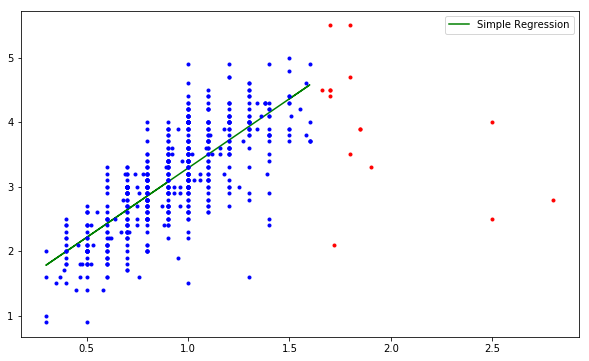

In [23]:
y_proba_inlier = lin_reg.predict(x_inlier)

f = plt.figure(figsize=(10, 6))
plt.plot(x_inlier, y_proba_inlier[:, 0], "g-", label="Simple Regression")
plt.plot(x_inlier, y_inlier, 'bo', markersize=3)
plt.plot(x_outlier, y_outlier, 'ro', markersize=3)
plt.legend(loc='best');

Did your model improve?

In [24]:
lin_reg.score(x_inlier, y_inlier)

0.5759809362257575

In [25]:
mean_squared_error(y_inlier, y_proba_inlier)

0.25569697465954533

Another important way to evaluate the quality of our model is by checking the residuals. The residuals represent the differences between each data point and the model. In good regression models the residuals are distributed randomly and evenly throughout the lenght of the model.

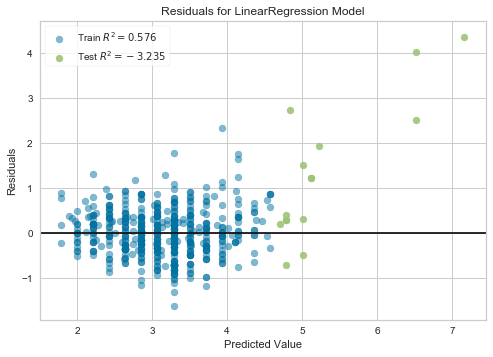

In [26]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(lin_reg, hist=False)

visualizer.fit(x_inlier, y_inlier)  
visualizer.score(x_outlier, y_outlier)
g = visualizer.poof() 

### 2D Regression

Now that we have seen how a linear regression model can be created, validated and obtimized, we can look at more complex regression tasks by adding one more feature.

However, let's use a different data set. 
Go to https://www.kaggle.com/loganalive/echocardiogram-uci and download the .csv file.

In [27]:
heart = pd.read_csv(r'echocardiogram.csv' )
heart.head(10)

,survival,alive,age,pericardialeffusion,fractionalshortening,epss,lvdd,wallmotion-score,wallmotion-index,mult,name,group,aliveat1
0,11.0,0.0,71.0,0.0,0.260,9.000,4.600,14.0,1.000,1.000,name,1,0.0
1,19.0,0.0,72.0,0.0,0.380,6.000,4.100,14.0,1.700,0.588,name,1,0.0
2,16.0,0.0,55.0,0.0,0.260,4.000,3.420,14.0,1.000,1.000,name,1,0.0
3,57.0,0.0,60.0,0.0,0.253,12.062,4.603,16.0,1.450,0.788,name,1,0.0
4,19.0,1.0,57.0,0.0,0.160,22.000,5.750,18.0,2.250,0.571,name,1,0.0
5,26.0,0.0,68.0,0.0,0.260,5.000,4.310,12.0,1.000,0.857,name,1,0.0
6,13.0,0.0,62.0,0.0,0.230,31.000,5.430,22.5,1.875,0.857,name,1,0.0
7,50.0,0.0,60.0,0.0,0.330,8.000,5.250,14.0,1.000,1.000,name,1,0.0
8,19.0,0.0,46.0,0.0,0.340,0.000,5.090,16.0,1.140,1.003,name,1,0.0
9,25.0,0.0,54.0,0.0,0.140,13.000,4.490,15.5,1.190,0.930,name,1,0.0


A description of the data can be found here: https://archive.ics.uci.edu/ml/datasets/echocardiogram 

Before we can start with the regression we need to check and clean up the data set:

In [28]:
heart.isnull().sum()

survival                 3
alive                    2
age                      7
pericardialeffusion      1
fractionalshortening     9
epss                    16
lvdd                    12
wallmotion-score         5
wallmotion-index         3
mult                     4
name                     2
group                   23
aliveat1                58
dtype: int64

We can see that this time there are a lot of missing values present in the data. 
For this task it should be ok to simply drop the last two features completely (since they contain the most missing values) and then drop the remaining rows with missing values. 

In [29]:
heart = heart.drop(['aliveat1', 'group'], axis=1)

In [30]:
heart=heart.dropna()

In [31]:
heart.shape

(106, 11)

We can choose to predict a binary label as before, which will in essence result in a classification task (e.g. alive). Or we can choose a continous variable (e.g. lvdd)

Again, feel free to choose both the label and the two features yourself. Which features do you think will yield a good result? Or, which regression model could improve treatment? 

In [32]:
alive = heart.iloc[:, 1]   # binary label
lvdd = heart.iloc[:, 6]    # continuous label

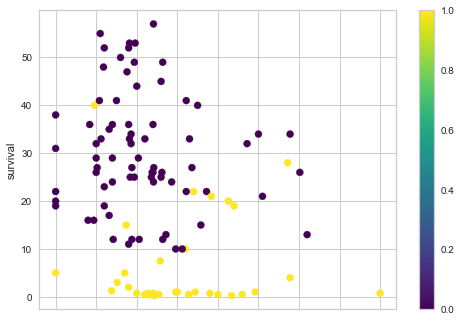

In [33]:
heart.plot.scatter(x='epss', y='survival', c=alive, colormap='viridis', s=50);

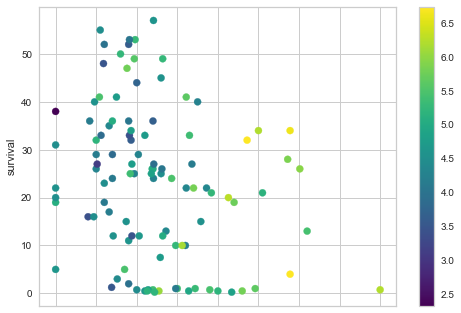

In [34]:
heart.plot.scatter(x='epss', y='survival', c=lvdd, colormap='viridis', s=50);

Once you have choosen the label and the two features we can create the data set subset. 

In [35]:
X2 = heart.ix[:, ['epss', 'survival']]
y2_bin = alive
y2_cont = lvdd

We need a regressor and then, in theory, we have all we need to calculate the model:

In [36]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X2, y2_bin)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

Just like with classifiers, there are a lot of differnt regressors we could use here. Which one will result in a good model depends on both the data and the task we want the model to fullfil. 

On order to get a feeling for how the different regressors work we can visualize the models they create. Bet before we can do that we have to split the data set into training and test data (just like we did in the classification exercise). 

In [37]:
X2 = X2.values

In [38]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_bin_train, y2_bin_test, y2_cont_train, y2_cont_test = train_test_split(X2, y2_bin, y2_cont, random_state=2304, test_size=0.15)

The following code will create a custome funktion that can plot the models created by the different regressors. There is no need for you to fully understand the code but you are welcome to take a look at it nontheless.

In [39]:
def plot_decision_regions(X, y, classifier):
    """
    Modified from https://github.com/rasbt/python-machine-learning-book/blob/master/code/ch03/ch03.ipynb
    """
    from matplotlib.colors import ListedColormap
    
    f = plt.figure()

    # Find the lower and upper values for the petal length and petal width
    x0_min, x0_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x1_min, x1_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    # Generate a bunch of measurements in-between the min and max values
    x0, x1 = np.meshgrid(
        np.linspace(x0_min, x0_max, 500).reshape(-1, 1),
        np.linspace(x1_min, x1_max, 200).reshape(-1, 1),
    )
    
    X_new = np.array([x0.ravel(), x1.ravel()]).T
    
    # Predict with the classifier on the new data
    Z = classifier.predict(X_new)
    
    # Reshape and plot as a contour plot:
    Z = Z.reshape(x0.shape)
    plt.contourf(x0, x1, Z, alpha=0.4, cmap=plt.cm.YlOrRd)
    
    # Add the training instances to the plot
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[:,0], 
                    y=X[:,1],
                    alpha=0.6, 
                    edgecolor='black',
                    c=y,
                    cmap='winter',
                    marker='x',
                    label=cl)



So, let's see how some of the most commonly used regressors work: 

You can select a binary and a continuos label and see the differnt ways the regressors deal with this. 

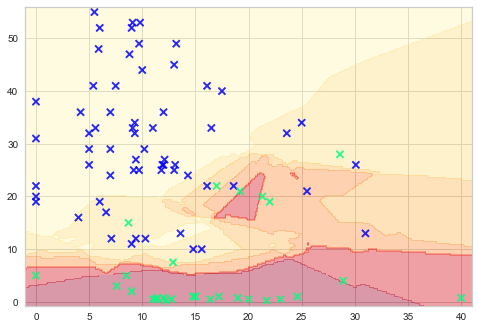

In [40]:
from sklearn.neighbors import KNeighborsRegressor
knn_reg_bin = KNeighborsRegressor()
knn_reg_bin.fit(X2_train, y2_bin_train)   #binary
plot_decision_regions(X2_train, y2_bin_train, knn_reg_bin)

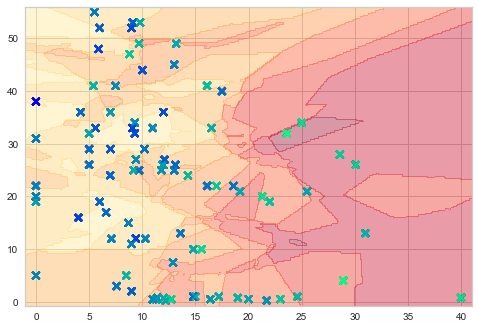

In [69]:
from sklearn.neighbors import KNeighborsRegressor
knn_reg_cont = KNeighborsRegressor()
knn_reg_cont.fit(X2_train, y2_cont_train)   #continuos
plot_decision_regions(X2_train, y2_cont_train, knn_reg_cont)

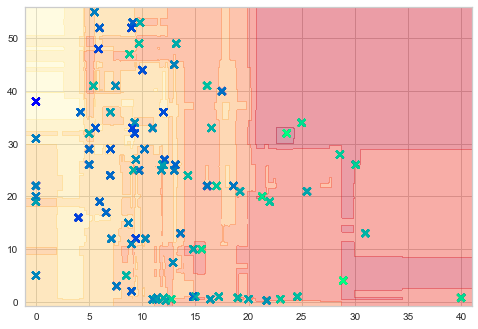

In [42]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X2_train, y2_cont_train)
plot_decision_regions(X2_train, y2_cont_train, rf_reg)

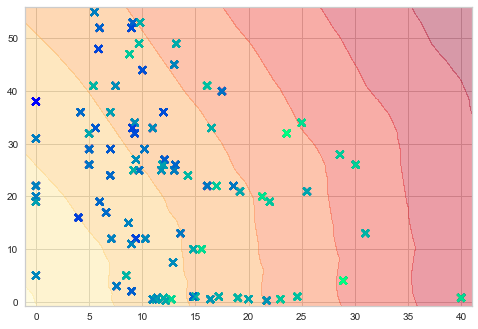

In [43]:
from sklearn.neural_network import MLPRegressor
mlp_reg = MLPRegressor()
mlp_reg.fit(X2_train, y2_cont_train)
plot_decision_regions(X2_train, y2_cont_train, mlp_reg)

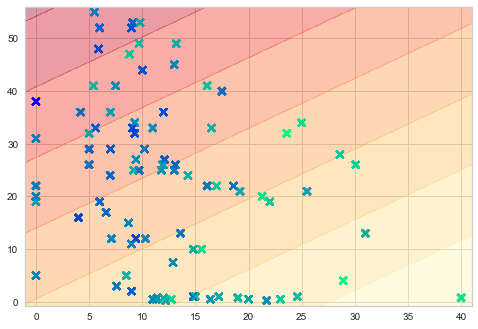

In [44]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor()
sgd_reg.fit(X2_train, y2_cont_train)
plot_decision_regions(X2_train, y2_cont_train, sgd_reg)

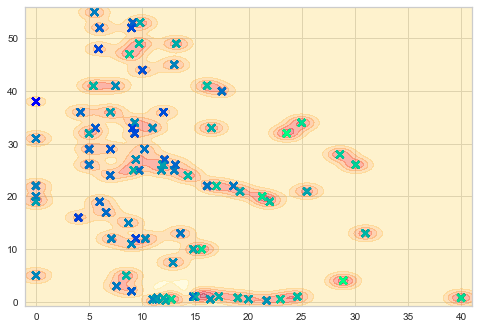

In [45]:
from sklearn.gaussian_process import GaussianProcessRegressor
gau_reg = GaussianProcessRegressor()
gau_reg.fit(X2_train, y2_cont_train)
plot_decision_regions(X2_train, y2_cont_train, gau_reg)

Now you can try and find the right regressor for the features and the label you selected. Try and calculate the $r^2$ and mse for the differnt models in order to decide which is best suited. 

In [46]:
knn_reg_cont.score(X2_test, y2_cont_test)              #Template for r^2
                                                        #A negative r^2 tells you that your model does not fit well at all

y2_cont_rf = knn_reg_cont.predict(X2_test)             #Template for mse
mean_squared_error(y2_cont_test, y2_cont_rf)

0.41557881249999995

### Multivariant Regression

We have now created regression models for two features as well as for two features plus a label. However, just as with classification, we can choose a whole list of features for our model. 

To keep things interesting, let's use a new data set again: 

In [47]:
#download from: https://www.kaggle.com/unsdsn/world-happiness
happy = pd.read_csv(r'2016.csv' )
happy.head(10)

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596
5,Canada,North America,6,7.404,7.335,7.473,1.44015,1.09610,0.82760,0.57370,0.31329,0.44834,2.70485
6,Netherlands,Western Europe,7,7.339,7.284,7.394,1.46468,1.02912,0.81231,0.55211,0.29927,0.47416,2.70749
7,New Zealand,Australia and New Zealand,8,7.334,7.264,7.404,1.36066,1.17278,0.83096,0.58147,0.41904,0.49401,2.47553
8,Australia,Australia and New Zealand,9,7.313,7.241,7.385,1.44443,1.10476,0.85120,0.56837,0.32331,0.47407,2.54650
9,Sweden,Western Europe,10,7.291,7.227,7.355,1.45181,1.08764,0.83121,0.58218,0.40867,0.38254,2.54734


If you have followed this exercise up until now you are already able to do this multivariant regression by yourself:

- Create the two data sets (one with all the features you want to use, and another with the feature you are trying to predict)
- Split the two data sets into training and test data
- Choose one of the regressors we used in the previous task and train the model
- Calculate $r^2$ and mse in order to find the ideal regressor

In [48]:
a = happy.ix[:, ['Generosity', 'Health (Life Expectancy)' , 'Economy (GDP per Capita)', 'Family', 'Freedom', 'Trust (Government Corruption)', 'Dystopia Residual']]
b = happy.ix[:, ['Happiness Score']]

In [49]:
X3_train, X3_test, y3_train, y3_test = train_test_split(a, b, random_state=2304)

In [50]:
rf_reg2 = RandomForestRegressor(random_state=42)
rf_reg2.fit(X3_train, y3_train)
print(rf_reg2.score(X3_test, y3_test))
y3_rf = rf_reg2.predict(X3_test)           
mean_squared_error(y3_test, y3_rf)

0.9150972227290047


0.10707565525000007

In [51]:
knn2_reg = KNeighborsRegressor()
knn2_reg.fit(X3_train, y3_train)
print(knn2_reg.score(X3_test, y3_test))
y3_knn = knn2_reg.predict(X3_test)           
mean_squared_error(y3_test, y3_knn)

0.944199280216381


0.07037341799999992

In [52]:
gau2_reg = GaussianProcessRegressor()
gau2_reg.fit(X3_train, y3_train)
print(gau2_reg.score(X3_test, y3_test))
y3_gau = gau2_reg.predict(X3_test)           
mean_squared_error(y3_test, y3_gau)

0.9984871444330945


0.0019079470228397471

In [53]:
mlp2_reg = MLPRegressor()
mlp2_reg.fit(X3_train, y3_train)
print(mlp2_reg.score(X3_test, y3_test))
y3_mlp = mlp2_reg.predict(X3_test)           
mean_squared_error(y3_test, y3_mlp)

0.9508572464722862


0.061976683259415896

If you are unsure about the relevance of the different features in your model you can calculate their importance:

In [54]:
importances=rf_reg2.feature_importances_
importances

array([0.00997775, 0.24294023, 0.34944442, 0.15669127, 0.05234332,
       0.02488895, 0.16371407])

In [55]:
indices = np.argsort(importances)[::-1]
for f in range(7): 
    print(f'{a.columns[indices[f]]}: {np.round(importances[indices[f]],2)}')

Economy (GDP per Capita): 0.35
Health (Life Expectancy): 0.24
Dystopia Residual: 0.16
Family: 0.16
Freedom: 0.05
Trust (Government Corruption): 0.02
Generosity: 0.01


### Optimization

As we have seen during the classification exercise, the different classifiers/regressors can be optimized. Let's try and improve the KNeighborsRegressor:

In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

We create a list (grid) of the different regressor parameters that we want to tune

In [57]:
n_neighbors = [int(x) for x in np.linspace(start = 1, stop = 20, num = 10)]
algorithm = ['ball_tree', 'kd_tree', 'brute', 'auto']
weights = ['uniform', 'distance']

random_grid = {'n_neighbors': n_neighbors, 'algorithm': algorithm, 'weights': weights}

print(random_grid)

{'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 20], 'algorithm': ['ball_tree', 'kd_tree', 'brute', 'auto'], 'weights': ['uniform', 'distance']}


Then we feed the grid into the optimizer. You can see that the optimizer tries to minimize the mse, just like we did before.

In [58]:
grid = GridSearchCV(estimator=knn2_reg, param_grid=random_grid, scoring='neg_mean_squared_error')
grid.fit(X3_train, y3_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 20], 'algorithm': ['ball_tree', 'kd_tree', 'brute', 'auto'], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [59]:
grid.best_estimator_

KNeighborsRegressor(algorithm='brute', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=7, p=2,
          weights='distance')

We take the best parameters found, copy/paste them into the Regressor and check if the model has improved

In [60]:
knn3_reg = KNeighborsRegressor(algorithm='brute', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=7, p=2,
          weights='distance')
knn3_reg.fit(X3_train, y3_train)
print(knn3_reg.score(X3_test, y3_test))
y3_knn3 = knn3_reg.predict(X3_test)           
mean_squared_error(y3_test, y3_knn3)

0.9486688568998122


0.06473658411244697